Import Statements

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle

## Visualization

In [3]:
file1 = open("C:\\Users\\caitl\\OneDrive\\Documents\\University of Washington\\434\\higgs_100000_pt_250_500.pkl",'rb')
signal = pickle.load(file1)
file2 = open("C:\\Users\\caitl\\OneDrive\\Documents\\University of Washington\\434\\qcd_100000_pt_250_500.pkl",'rb')
background = pickle.load(file2)

In [4]:
signal #printing to see labels but Jupyter makes it pretty (copyright Parker, 2024)

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


## Exploration

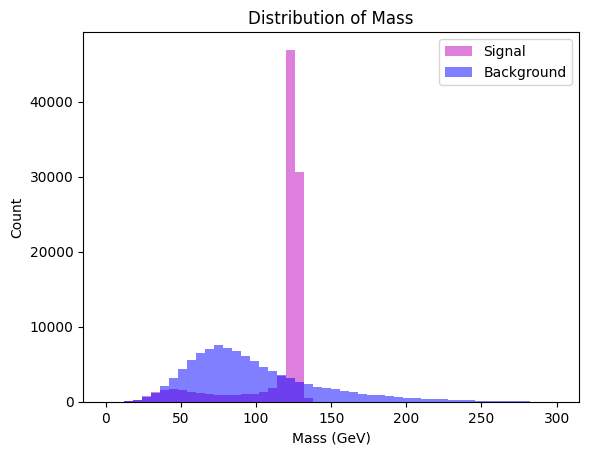

In [5]:
plt.hist(signal['mass'],color = 'm',label = 'Signal',bins = 50,alpha = 0.5,range = (0,300))
plt.hist(background['mass'],color = 'b',label = 'Background',bins = 50,alpha = 0.5,range = (0,300))
plt.xlabel('Mass (GeV)')
plt.ylabel('Count')
plt.legend(['Signal','Background'])
plt.title('Distribution of Mass')
plt.show()

The distribution of signal is left skewed with a very large peak near 125, while the distribution of background is slightly right skewed with a peak closer to 75. The signal is easily distinguishable from the background.

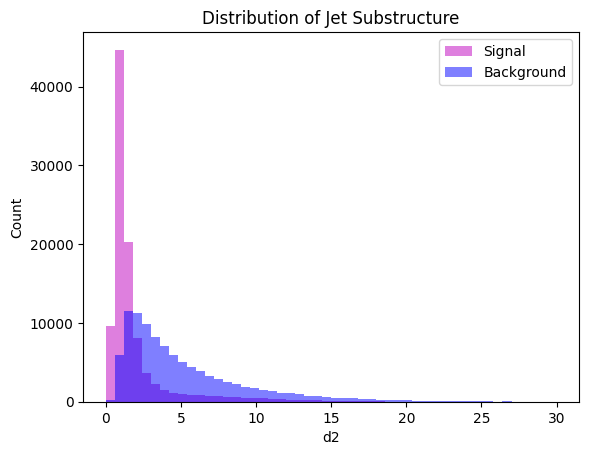

In [6]:
plt.hist(signal['d2'],color = 'm',label = 'Signal',bins = 50,alpha = 0.5,range = (0,30))
plt.hist(background['d2'],color = 'b',label = 'Background',bins = 50,alpha = 0.5,range = (0,30))
plt.xlabel('d2')
plt.ylabel('Count')
plt.legend(['Signal','Background'])
plt.title('Distribution of Jet Substructure')
plt.show()

Both distributions are right skewed with a peak near 2, but the signal has a much higher peak. Distinguishing the signal is slightly more difficult for d2 than mass due to the similarity of peak location.

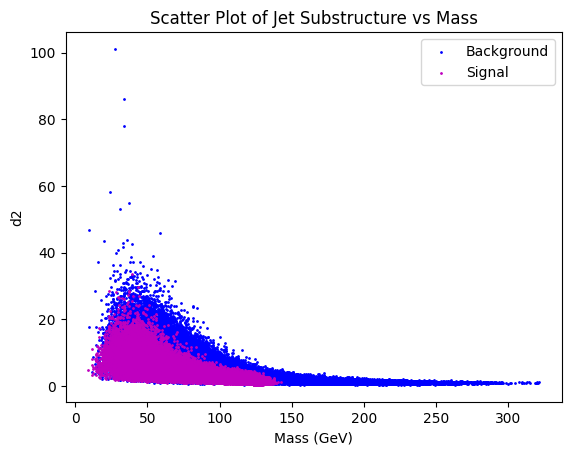

In [7]:
plt.scatter(background['mass'],background['d2'],color = 'b',s = 1)
plt.scatter(signal['mass'],signal['d2'],color = 'm',s = 1)
plt.xlabel('Mass (GeV)')
plt.ylabel('d2')
plt.legend(['Background','Signal'])
plt.title('Scatter Plot of Jet Substructure vs Mass')
plt.show()

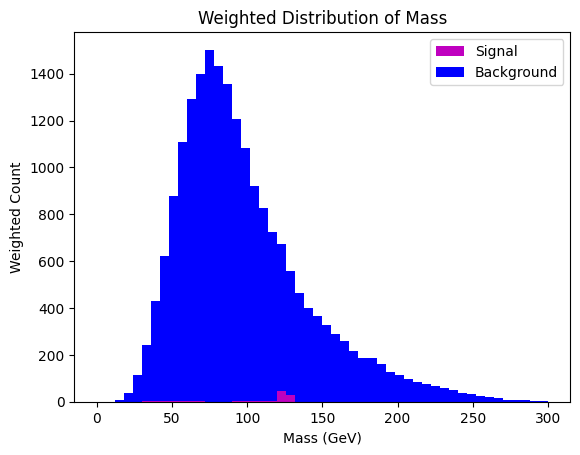

In [30]:
signalMassW = 0.001 * np.ones(signal['mass'].shape[0]) #weighting mass for signal by 0.001
backgroundMassW = 0.2 * np.ones(background['mass'].shape[0]) #weighting mass for background by 0.2 (same difference in magnitude between 100 and 20,000)
signald2W = 0.001 * np.ones(signal['d2'].shape[0]) #weighting d2 for signal by 0.001
backgroundd2W = 0.2 * np.ones(background['d2'].shape[0]) #weighting mass for background by 0.2

plt.hist([signal['mass'],background['mass']],color = ['m','b'],bins = 50,range = (0,300),weights = [signalMassW,backgroundMassW],stacked = True)
plt.xlabel('Mass (GeV)')
plt.ylabel('Weighted Count')
plt.legend(['Signal','Background'])
plt.title('Weighted Distribution of Mass')
plt.show()

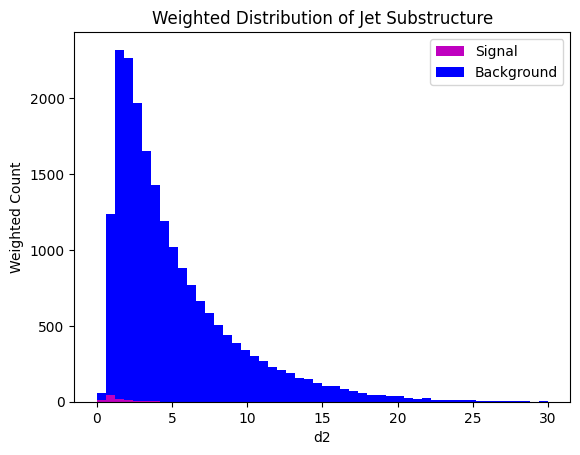

In [32]:
plt.hist([signal['d2'],background['d2']],color = ['m','b'],bins = 50,range = (0,30),weights = [signald2W,backgroundd2W],stacked = True)
plt.xlabel('d2')
plt.ylabel('Weighted Count')
plt.legend(['Signal','Background'])
plt.title('Weighted Distribution of Jet Substructure')
plt.show()

The visibility of the signal has significantly decreased both for mass and d2 to the point of being almost nonexistant.

In [10]:
signalCoolM = signal[(signal['mass'] >= 120) & (signal['mass'] <= 130)] 
    #selecting all signal particles with masses between 120 and 130 GeV
backgroundCoolM = background[(background['mass'] >= 120) & (background['mass'] <= 130)] 
    #selecting all background particles with masses between 120 and 130 GeV

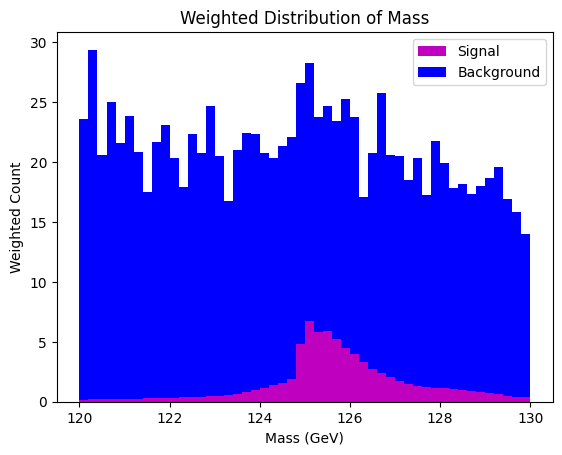

In [33]:
signalCoolMassW = 0.001 * np.ones(signalCoolM['mass'].shape[0]) #weighting mass for signal by 0.001
backgroundCoolMassW = 0.2 * np.ones(backgroundCoolM['mass'].shape[0]) #weighting mass for background by 0.2
signalCoold2W = 0.001 * np.ones(signalCoolM['d2'].shape[0]) #weighting d2 for signal by 0.001
backgroundCoold2W = 0.2 * np.ones(backgroundCoolM['d2'].shape[0]) #weighting mass for background by 0.2

plt.hist([signalCoolM['mass'],backgroundCoolM['mass']],color = ['m','b'],bins = 50,weights = [signalCoolMassW,backgroundCoolMassW],stacked = True)
plt.xlabel('Mass (GeV)')
plt.ylabel('Weighted Count')
plt.legend(['Signal','Background'])
plt.title('Weighted Distribution of Mass')
plt.show()

The mass does not look how I expected, as it is still not really evident that the signal exists from the overall distribution. However, it is a large improvement from the previous mass histogram, as we are able to see the shape of the signal distribution more.

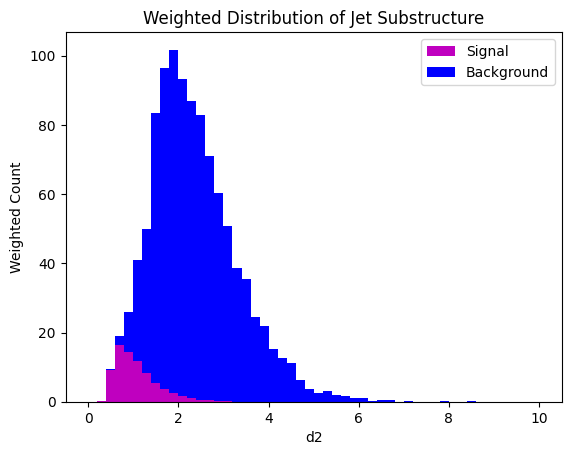

In [34]:
plt.hist([signalCoolM['d2'],backgroundCoolM['d2']],color = ['m','b'],bins = 50,range = (0,10),weights = [signalCoold2W,backgroundCoold2W],stacked = True)
plt.xlabel('d2')
plt.ylabel('Weighted Count')
plt.legend(['Signal','Background'])
plt.title('Weighted Distribution of Jet Substructure')
plt.show()

This d2 plot has a much lower range of d2 values compared to the previous histogram, which makes it slightly easier to see the signal distribution. However, similarly to the previous d2 histogram, it is difficult to distinguish that the signal exists by observing the overall distribution.

## Significance Optimization

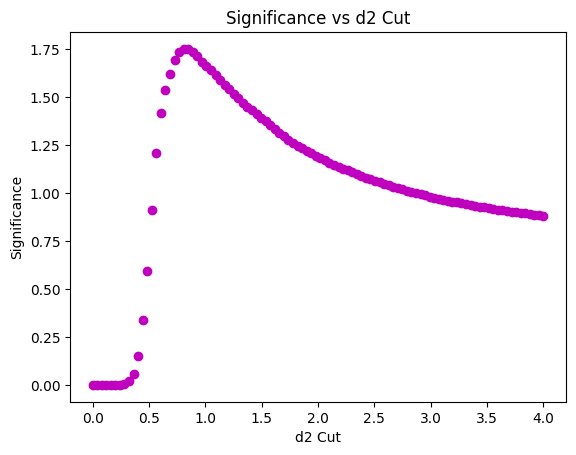

In [17]:
d2 = np.linspace(0,4,100) #range of values for d2 chosen based on graph above
z = np.zeros(100) #creating array for significance values

for i in range(100):
    signalCoold2 = signal[signal['d2'] <= d2[i]] #selecting all signal particles with d2 in the range 0 to d2[i]
    backgroundCoold2 = background[background['d2'] <= d2[i]] #selecting all background particles with d2 in the range 0 to d2[i]
    signalSum = len(signalCoold2['d2']) * 0.001 #calculating weighted signal count
    backgroundSum = len(backgroundCoold2['d2']) * 0.2 ##calculating weighted background count
    if backgroundSum == 0:
        z[i] = 0 #no significance if there is no background
    else:
        z[i] = signalSum / np.sqrt(backgroundSum) #adding significance value to array

plt.scatter(d2,z,color = 'm')
plt.xlabel('d2 Cut')
plt.ylabel('Significance')
plt.title('Significance vs d2 Cut')
plt.show()

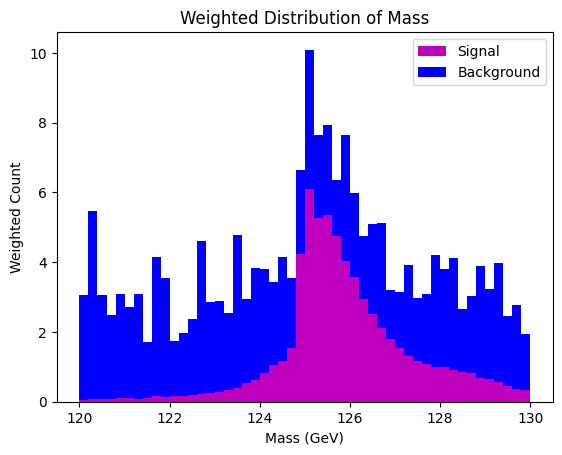

In [35]:
sigma = 3 * np.std(z) #calculating 3*sigma for significance
d2cut = 0 #variable for d2 cut

for i in range(100):
    if z[99 - i] >= sigma:
        d2cut = d2[99 - i] #finding d2 cut from upper bound since lower bound is constant at 0
        break

signalCool = signalCoolM[signalCoolM['d2'] <= d2cut] #signal with mass and d2 cuts
backgroundCool = backgroundCoolM[backgroundCoolM['d2'] <= d2cut] #background with mass and d2 cuts
signalCoolW = 0.001 * np.ones(signalCool['mass'].shape[0]) #weighting mass for signal by 0.001
backgroundCoolW = 0.2 * np.ones(backgroundCool['mass'].shape[0]) #weighting mass for background by 0.2

plt.hist([signalCool['mass'],backgroundCool['mass']],color = ['m','b'],bins = 50,weights = [signalCoolW,backgroundCoolW],stacked = True)
plt.xlabel('Mass (GeV)')
plt.ylabel('Weighted Count')
plt.legend(['Signal','Background'])
plt.title('Weighted Distribution of Mass')
plt.show()

It is much more obvious that the signal deviates from the background distribution, as we have eliminated enough background that the signal causes a spike in the distribution that was not apparent before. The signal count is also not small anymore compared to the background like when only the mass cut was made.

In [28]:
signalCount = len(signalCool['mass']) * 0.001 #calculating weighted signal count
backgroundCount = len(backgroundCool['mass']) * 0.2 #calculating weighted background count
zBest = signalCount / np.sqrt(backgroundCount)
print('The significance vale with both mass and d2 cuts is',zBest)

The significance vale with both mass and d2 cuts is 5.547584449414746
